# Working with data 2017. Class 5
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
## 1 Assumptions of t-test and regression
- Normality 
- Independent and identically distributed (i.i.d.)
- Equal variance
- (for linear regression) Uncorrelated residuals


## 2.  groups
- Compare one group vs one value
- Compare two groups 
- Compare two paired groups
    
## 3. Multiple groups
- ANOVA
- Multiple comparison (Tukey correction)
    
## 4.  Regressions
- Linear regression
- Logistic regression
- Machine learning

In [1]:
#Install something we'll need
!pip install --user scikits.bootstrap

#Requires restarting the kernel

In [6]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikits.bootstrap as bootstrap

# 1. Assumptions of most tests


## 1.1 Normality


In [4]:
Image(url="https://kanbanize.com/blog/wp-content/uploads/2014/07/Standard_deviation_diagram.png", width=500)

**How to test it**
- QQ plot. Measure our quantiles vs hypothetical quantiles.
- Most tests are resistant to small deviations.

In [3]:
def qq_plot(x):
    import scipy.stats
    (osm, osr),(slope, intercept, r)  = scipy.stats.probplot(x, dist='norm', plot=None)
    plt.plot(osm, osr, '.', osm, slope*osm + intercept)
    plt.xlabel('Quantiles',fontsize=14)
    plt.ylabel('Quantiles Obs',fontsize=14)  

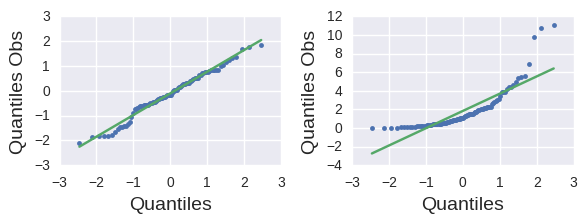

In [55]:
x = np.random.randn(100)
plt.subplot(2,2,1)
qq_plot(x)

x = np.random.exponential(2,100)
plt.subplot(2,2,2)
qq_plot(x)


plt.tight_layout()
plt.show()

## 1.2 Equal variance (if two or more groups)


In [33]:
Image(url="http://goodsciencebadscience.nl/wp-content/uploads/2012/09/variances1.gif",width=500)

**How to test it**
- Levene test (it doesn't assume normality)


In [28]:
#random normal data (mean 0 std 1)
x = np.random.randn(100)
#random normal data (mean 0 std 2)
y = np.random.randn(100)*2

#Test
print(scipy.stats.levene(x,y))


LeveneResult(statistic=25.342692534190114, pvalue=1.075710331496283e-06)


## 1.3 i.i.d. (independent and identically distributed)
This comes from the data collection.
- Each observation is independent
- There are no subpopulations in the population

## 1.4 Uncorrelated residuals (for linear regression)



In [34]:
print("These are the residuals")
Image(url="https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png",width=500)

These are the residuals


In [8]:
Image(url="https://i.stack.imgur.com/RU17l.png")

## 1.4 No or little multicolinearity (for linear regression)
- Your dependent variables are not measuring the same thing


# 2. t-test

## 2.1 Sample against value
- Imagine you measure increase in productivity, and you want to see if the increase is significant

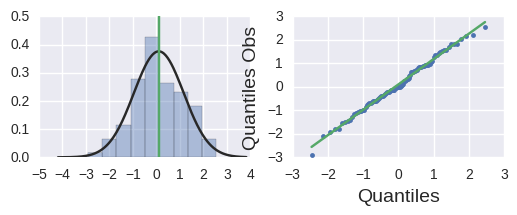

--------------------
Test for mean of group different than zero


Ttest_1sampResult(statistic=0.95479388493784956, pvalue=0.3420075419740819)

In [106]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=False,fit=norm)
plt.plot([np.mean(x),np.mean(x)],[0,0.5])

plt.subplot(2,2,2)
qq_plot(x)
plt.show()


print("-"*20)
print("Test for mean of group different than zero")
scipy.stats.ttest_1samp(x,popmean=0)

## 2.2 Two independent samples
- Imagine you measure productivity for a control group and a experimental group
- Imagine it's normally distributed 
- You want to see if the productivity of the groups is different

Test for equal variance
LeveneResult(statistic=0.16415494409080017, pvalue=0.68579702917494489)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


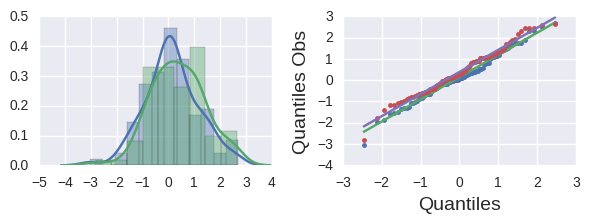

--------------------
Test for different means


Ttest_indResult(statistic=-1.659774671849136, pvalue=0.098542746469798756)

In [57]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.5 and std 1
y = np.random.randn(100)+0.5


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()

print("-"*20)
print("Test for different means")
scipy.stats.ttest_ind(x,y)

## 2.3 Two paired samples
- Imagine you measure productivity for a group before starting a new program and after the program (each individual has two observations)
- Imagine it's normally distributed
- You can test if the productivity has increased

Test for equal variance
LeveneResult(statistic=0.0077669369990537472, pvalue=0.9298622426820331)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


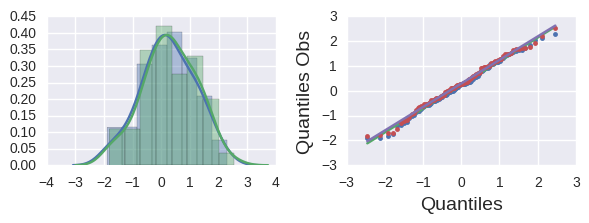

WRONG: What would happen if we don't use paired t-test
Ttest_indResult(statistic=-0.46906387345400657, pvalue=0.63954004715409596)
--------------------
Test for different means


Ttest_relResult(statistic=-6.4397422069891075, pvalue=4.332429744679758e-09)

In [61]:
from scipy.stats import norm
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, similar to x but adding 0.05 and some random noise
y = x+np.random.randn(100)/10 + 0.05


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))

#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()

print("WRONG: What would happen if we don't use paired t-test")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means")
scipy.stats.ttest_rel(x,y)


## 2.4 What happens if they don't have equal variance? (But normality)

In [94]:
scipy.stats.ttest_rel?

Test for equal variance
LeveneResult(statistic=36.363479271139887, pvalue=1.2500317394185147e-08)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


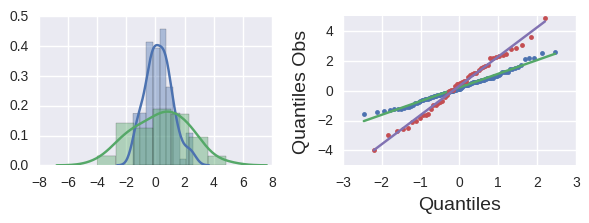

WRONG: What happens if we try the test assumming equal variance
Ttest_indResult(statistic=-0.47808538237296833, pvalue=0.63329484609121234)
--------------------
Test for different means with different variance


Ttest_indResult(statistic=-0.38528205421446032, pvalue=0.70138472131656548)

In [62]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 2
y = np.random.randn(50)*2+0.2


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))


#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.tight_layout()
plt.show()

print("WRONG: What happens if we try the test assumming equal variance")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means with different variance")
scipy.stats.ttest_ind(x,y,equal_var=False)


## 2.5 What happens if they are not normally distributed (but equal variance)
- Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
- Mann-Whitney-U 

Test for equal variance
LeveneResult(statistic=0.92000039623950469, pvalue=0.33864464018557927)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


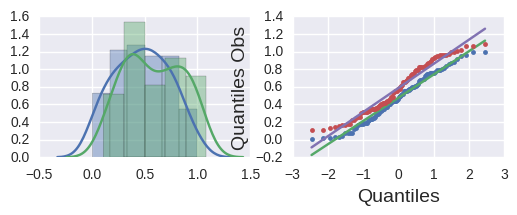

WRONG: What happens if we try t-test
Ttest_relResult(statistic=-2.9340464918405078, pvalue=0.004158164238097518)
--------------------
Test for different means with no normal distributions, equal variance and paired samples


RanksumsResult(statistic=-2.592435609240797, pvalue=0.0095299019114076632)

In [66]:
#Our sample, normally distributed with mean 0.and std 1
x = np.random.random(100)
#Our other sample, normally distributed with mean 0.1 and std 1
y = np.random.random(100)+0.1


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))


#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.show()

print("WRONG: What happens if we try t-test")
print(scipy.stats.ttest_rel(x,y))

print("-"*20)
print("Test for different means with no normal distributions, equal variance and paired samples")
scipy.stats.ranksums(x,y)


## 2.6 What happens if they are not normally distributed (but equal variance) and paired samples?
- Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
- Wilcoxon signed ranksum 

Test for equal variance
LeveneResult(statistic=0.071306944896463054, pvalue=0.78972120894092668)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


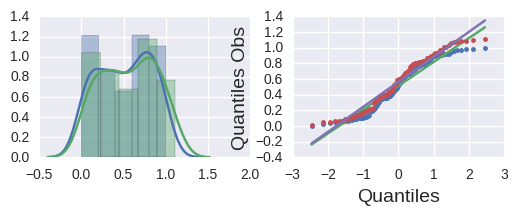

WRONG: What happens if we try t-test
Ttest_indResult(statistic=-1.1337425393420619, pvalue=0.25827339725624487)
--------------------
Test for different means with no normal distributions and equal variance
MannwhitneyuResult(statistic=4528.0, pvalue=0.12464864892835237)
RanksumsResult(statistic=-1.1532795547235213, pvalue=0.24879565914868151)


WilcoxonResult(statistic=1114.0, pvalue=1.2254582205086871e-06)

In [67]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.random(100)
#Our other sample, normally distributed with mean 0.05 and std 1 and some random noise
y = x+np.random.randn(100)/10 + 0.05

#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y))


#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)

plt.show()

print("WRONG: What happens if we try t-test")
print(scipy.stats.ttest_ind(x,y))

print("-"*20)
print("Test for different means with no normal distributions and equal variance")
print(scipy.stats.mannwhitneyu(x,y))
print(scipy.stats.ranksums(x,y))
scipy.stats.wilcoxon(x,y)



## 2.6 What happens if they are not normally distributed and not equal variance?
- You can only test if the distributions are different (booo)
- scipy.stats.mannwhitneyu(x,y)

---

# 3. More than two samples

### ANOVA (Parametric) or Kruskal-Wallis (Non parametric)

Analysis of variance (ANOVA) is a collection of statistical models used to analyze the differences between group means and their associated procedures (such as "variation" among and between groups). 
- ~ t-test
- If normality


The Kruskal–Wallis one-way analysis of variance by ranks (named after William Kruskal and W. Allen Wallis) is a non-parametric method for testing whether samples originate from the same distribution. 
- ~ Mann-Whitney-U 
- If no-normality but equal variance

## 3.1 Compare if the groups are different

Test for equal variance
LeveneResult(statistic=0.65625938304129627, pvalue=0.51953892038097926)


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


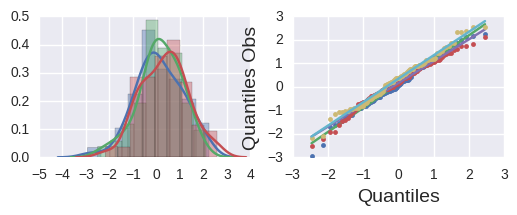

--------------------
ONE-WAY ANOVA
F_onewayResult(statistic=1.3491140188942516, pvalue=0.26105541587970538)
--------------------
ONE-WAY KRUSKAL WALLIS
KruskalResult(statistic=2.1092970099668946, pvalue=0.34831483672108643)


In [126]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 1
y = np.random.randn(100)+0.2
#Our other sample, normally distributed with mean 0.3 and std 1
z = np.random.randn(100)+0.3


#Equal variance?
print("Test for equal variance")
print(scipy.stats.levene(x,y,z))


#histogram
plt.subplot(2,2,1)
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)
sns.distplot(z,kde=True)


plt.subplot(2,2,2)
qq_plot(x)
qq_plot(y)
qq_plot(z)

plt.show()

print("-"*20)
print("ONE-WAY ANOVA")
print(scipy.stats.f_oneway(x, y, z)    )
print("-"*20)
print("ONE-WAY KRUSKAL WALLIS") #use if not-normal and equal variance
print(scipy.stats.mstats.kruskalwallis(x,y,z))




## 3.2 Problem with many groups (look-elsewhere bias)

In [68]:
#Let's compare two identical samples, see how often we get false results
for i in range(100):
    x = np.random.randn(100)
    y = np.random.randn(100)
    stat, pvalue = scipy.stats.ttest_ind(x,y)
    if pvalue < 0.05: 
        print(i,pvalue)
    


38 0.0105192249617
41 0.0267136250531
91 0.0381411440736


## 3.3 Compare which groups are different

### 3.3.1 Bonferroni correction
 - Corrects for the number of comparisons that you WILL make (Set p-value before the experiment. Don't cheat please)
 - New threhold to consider something significant is $\frac{0.05}{\#\ of\ comparisons}$

In [143]:
#Our sample, normally distributed with mean 0.1 and std 1
x = np.random.randn(100)+0.1
#Our other sample, normally distributed with mean 0.2 and std 1
y = np.random.randn(100)+0.2
#Our other sample, normally distributed with mean 0.3 and std 1
z = np.random.randn(100)+0.3
#Our other sample, normally distributed with mean 0.3 and std 1
w = np.random.randn(100)+0.5

print("New threshold (instead of 0.05) = ",0.05/6)

#Compare x and y
print("x and y: ", scipy.stats.ttest_ind(x,y))
#Compare x and z
print("x and z: ", scipy.stats.ttest_ind(x,z))
#Compare x and w
print("x and w: ", scipy.stats.ttest_ind(x,w))
#Compare y and z
print("y and z: ", scipy.stats.ttest_ind(y,z))
#Compare y and w
print("y and w: ", scipy.stats.ttest_ind(y,w))
#Compare z and w
print("z and w: ", scipy.stats.ttest_ind(z,w))

New threshold (instead of 0.05) =  0.008333333333333333
x and y:  Ttest_indResult(statistic=-1.1733360153589099, pvalue=0.24207061569183175)
x and z:  Ttest_indResult(statistic=-0.48371613883448783, pvalue=0.62912186502336187)
x and w:  Ttest_indResult(statistic=-2.8055358387049161, pvalue=0.0055245094514592679)
y and z:  Ttest_indResult(statistic=0.62277344787205191, pvalue=0.53415001801520257)
y and w:  Ttest_indResult(statistic=-1.6375889057314423, pvalue=0.10309573127594129)
z and w:  Ttest_indResult(statistic=-2.1628799414671489, pvalue=0.03174891786480339)


### 3.3.2 Tukey's HSD (honest significant difference) test. Best
- Assumes normality
- Much more power (less false negatives) than Bonferroni (bonferroni with many samples is hard)

In [144]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [70]:
df = pd.read_csv("data/tukey_example.csv")
df.sample(10)

,productivity,group
387,0.960968,d
55,1.142899,a
134,-0.879679,b
144,0.915691,b
36,-1.380990,a
183,1.307047,b
16,0.491009,a
157,-0.605548,b
182,0.463385,b
277,1.020049,c


In [152]:
res2 = pairwise_tukeyhsd(df["productivity"],df["group"])
print(res2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  a      b     0.0542  -0.2883 0.3967 False 
  a      c     0.1966  -0.1459 0.5392 False 
  a      d     0.5083   0.1658 0.8509  True 
  b      c     0.1424  -0.2001 0.485  False 
  b      d     0.4541   0.1116 0.7967  True 
  c      d     0.3117  -0.0308 0.6542 False 
--------------------------------------------


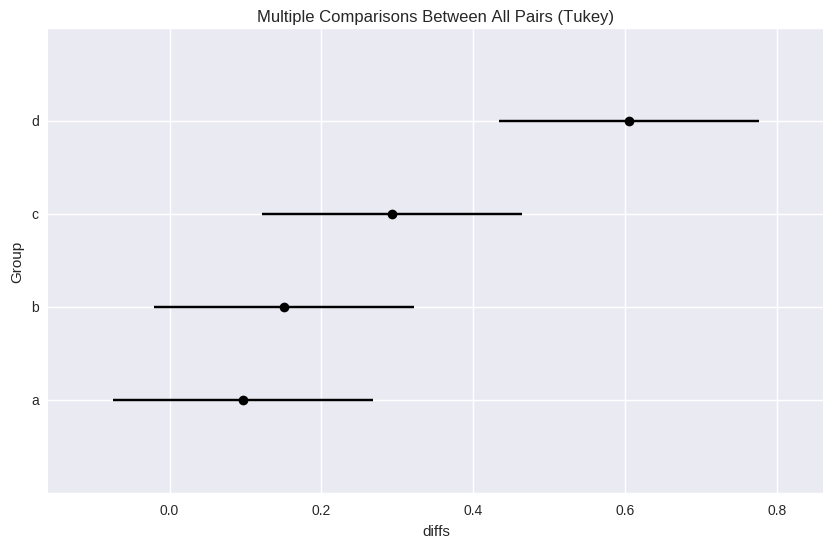

In [160]:
res2.plot_simultaneous(comparison_name=None,xlabel='diffs',ylabel='Group')
plt.show()

# 4. Fitting distributions
## Why do we care about distributions?
- They tell us a lot about the mechanism generating our values

- Normal distribution: 
    - Nothing weird going on (just normal)
- Lognormal distribution: 
    - Multiplicative process: 
        - The value depends on the multiplication of many normal variables.
        - For example, each unit of time you can grow depending on some random factors.
    - Many financial indicators are lognormally distributed
    - Looks like a normal distribution if you take the logarithm of your values (np.log(x))
- Exponential distribution: 
    - Time between events (generated by poisson events)
    - If the time between events follows an exponential distribution the events are independent
    - It's a straight line if the y axis is in log scale
- Power-law distribution: 
    - Rich-get-richer mechanism: Your growth depends on your value -> Inequality is unavoidable
    - The **tails** of some human and financial phenomena follow power-laws.
    - The tail is a straight line in log-log scale (both y and x axis)
    
- Binomial distribution: Number of successes out of a number of trials. Each event independent
- Poisson distribution: Number of successes in some time. Each event independent




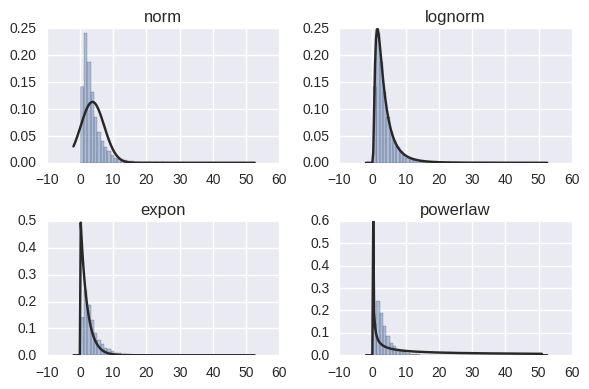

In [73]:
from scipy.stats import lognorm,norm,expon,powerlaw
x = np.random.lognormal(1,0.8,3000) 
plt.subplot(2,2,1)
sns.distplot(x,fit=norm,kde=False)
plt.title("norm")

plt.subplot(2,2,2)
sns.distplot(x,fit=lognorm,kde=False)
plt.title("lognorm")

plt.subplot(2,2,3)
sns.distplot(x,fit=expon,kde=False)
plt.title("expon")

plt.subplot(2,2,4)
sns.distplot(x,fit=powerlaw,kde=False)
plt.title("powerlaw")

plt.tight_layout()
plt.show()

# 5. Calculate Confidence Intervals with bootstrap methods
- How does it work?
- You have a sample (imagine 100 values)
- Do 10000 times: 
    - Take 100 values from the sample (with replacement)
    - Calculate the mean (or std)
- Take the percentiles 2.5 and 97.5 of those 10000 values -> Those are your confidence intervals (kind-of)


In [74]:
import scikits.bootstrap as bootstrap

In [76]:
#Bootstrap of mean and std
x = np.random.randn(100)*3 #this could be one of our columns

CIs = bootstrap.ci(x, statfunction=np.mean,n_samples=10000)  
print('CI for mean with bootstrapping = ', CIs)

CIs = bootstrap.ci(x, statfunction=np.std,n_samples=10000)  
print('CI for std with bootstrapping = ', CIs)

CI for mean with bootstrapping =  [-0.97928637  0.23020291]
CI for std with bootstrapping =  [ 2.77961389  3.47651269]


In [77]:
#Bootsrap of p-value
def return_pvalue(x):
    stat,pvalue = scipy.stats.ttest_1samp(x,0)
    return pvalue

CIs = bootstrap.ci(x, statfunction=return_pvalue, n_samples=10000)  
print('CI for p-value with bootstrapping = ', CIs)

CI for p-value with bootstrapping =  [ 0.00317859  0.96085417]


# In class exercise 


In [78]:
df = pd.read_csv("data/big3_position.csv",sep="\t")
df.head()



,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
0,INVESCO LTD,BM40671R,17.85,1,7500000.0,NaN,7500.0,13123024.0,New York Stock Exchange (NYSE),Bank
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,7500000.0,NaN,7500.0,16739323.0,New York Stock Exchange (NYSE),Industrial company
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,350000.0,NaN,1500.0,43392.0,New York Stock Exchange (NYSE),Industrial company
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,350000.0,NaN,750.0,26674.0,NASDAQ National Market,Industrial company
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NaN,NaN,NaN,44120.0,NYSE ARCA,Industrial company


## PartA. Compare the number of employees of industrial vs financial companies

In [79]:
industrial = df.loc[df["TypeEnt"]=="Industrial company"]
financial = df.loc[df["TypeEnt"]=="Financial company"]

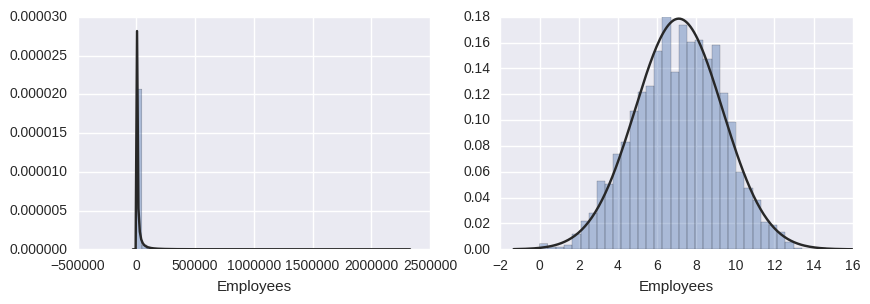

In [80]:
#Employees (like most is lognormally distributed -> we can convert it to a normal distribution and run our tests happily)
i = np.log(industrial["Employees"].dropna())
f = np.log(financial["Employees"].dropna())

from scipy.stats import lognorm,norm
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df["Employees"].dropna(),fit=lognorm,kde=False)

plt.subplot(1,2,2)
sns.distplot(np.log(df["Employees"].dropna()),fit=norm,kde=False)

In [155]:
#Check if our distributions have the same variance


In [154]:
#Plot histograms and qq_plots for i and f


In [156]:
#Run the correct statistical test


## PartB. Compare the market capitalization for different types of companies

In [ ]:
#Create a new column that is the logarithm of "MarketCap", call it "logMarketCap"


In [ ]:
#Find the distribution of "MarketCap" and "logMarketCap", fitting the rigth distribution



In [73]:
#Replace infinite values (log(0) = infinite) with nan
df = df.replace([np.inf, -np.inf], np.nan)

#Drop na values if "logMarketCap" is na 
df = df.dropna(subset=["logMarketCap"])

In [ ]:
#Kepe only three types of entities
df = df.loc[df["TypeEnt"].isin(["Financial company","Industrial company","Bank"])]

Bank
Financial company
Industrial company


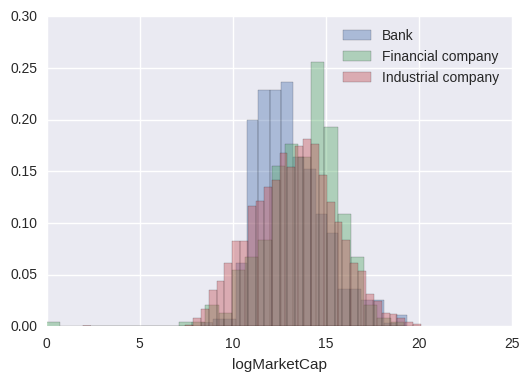

In [93]:
#Plot distributions for each type
plt.figure(figsize=(6,4))
for typeent,group in df.groupby("TypeEnt"):
    sns.distplot(group["logMarketCap"],kde=False,norm_hist=True,label=typeent)

    plt.legend()

In [153]:
#Run ANOVA


In [152]:
#Run Tukey test


In [ ]:
#Plot tukey test
